In [50]:
"""Here we are importing several modules 
   for example :
       pandas for getting our dataframe and performing related operations i.e. Data Manipulation
       matplotlib and seaborn for data visualization
       NumPy is a python library used for working with arrays
       The OS module in python provides functions for interacting with the operating system. 
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys,os,time
print("Modules Imported ")

Modules Imported 


In [51]:
 """"os-operating system , chdir-change directory
     The method chdir() changes the current working directory to the given path.
 """
os.chdir("C:\\Users\\shagu\\OneDrive\\Desktop\\books\\extras\\FOXMULA ML\\creditcard.csv")

In [52]:
df=pd.read_csv("creditcard.csv")


In [53]:
"""
    Checking for null values using .isnull() method and .sum() will give sum of null values
    for each column in the dataframe df
    After running the cell we found that there are NO null values in our dataset
"""
df.shape
df.isnull().sum()
print(df['Class'].value_counts()) 

0    284315
1       492
Name: Class, dtype: int64


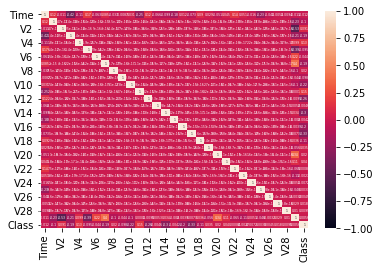

In [54]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size":3},vmax=1,vmin=-1)

In [55]:
"""
Spliting the dataframe into test and train dataset , this is also known as split validation
The ratio of 2 splits is usually approx 70/30 or 80/20
meaning training dataset accounts 70 % - 80% of rows in your dataset
and remaining 20%-30% of rows are left for test datset 

"""
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state = 19)

In [56]:
"""
As our target variable is "Class" , WE will store it in "y"
and all other input varibales in "x"
"""
def split_x_n_y(frame):
    inde=frame.drop(['Class'],axis=1)
    target=frame['Class']
    return inde,target
x_train, y_train = split_x_n_y(train)
x_test, y_test = split_x_n_y(test)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
"""
Supervised Machine learning has two types of algos namely:
Regression 
Classification

Logistic Regression comes under classification algorithm .
Logistic Regression is not a regression.
"""
test_prediction = model.predict(x_test)
print(test_prediction)

[0 0 0 ... 0 0 0]


In [59]:
"""
Accuracy is defined as the percentage of correct predictions for the
test data. 
It can be calculated easily by dividing the number of correct predictions 
by the number of total predictions.
"""
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, test_prediction)
print(score)


0.9990637032875719


In [60]:
train_prediction = model.predict(x_train)
train_score = accuracy_score(y_train, train_prediction)
print(train_score)


0.9991623362292089


In [61]:
'''
              fp
      fpr=-----------------
             fp+tn

fpr : false postive rate 
 
      tp
 tpr=----------
     tp+fn

     
   tpr : true positive Rate

   f: false
   t:true
   n:negative
   p:positive


AUC : AREA UNDER THE CURVE
IT SHOULD BE MAXIMUM POSSIBLE

'''
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,test_prediction)
area=auc(fpr,tpr)
print(area)

0.8631047096479194


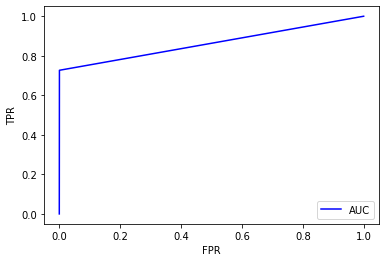

In [62]:
plt.plot(fpr,tpr,"b",label="AUC")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
